In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

while 'notebooks' in os.getcwd():
    os.chdir("..")
api_key = "demo"

In [2]:
from transformers import BertTokenizer, BertForSequenceClassification

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

2023-08-21 17:51:51.310909: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-21 17:51:51.791504: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-21 17:51:51.792941: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 17:51:53.720737: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
def get_customized_news(stock, start_date, end_date, n_news, api_key, offset = 0):
    url = f'https://eodhistoricaldata.com/api/news?api_token={api_key}&s={stock}&limit={n_news}&offset={offset}&from={start_date}&to={end_date}'
    news_json = requests.get(url).json()
    
    news = []
    news_complete = []
    
    for i in range(len(news_json)):
        title = news_json[-i]['title']
        complete = news_json[-i]
        news.append(title)
        news_complete.append(complete)
    
    return news, news_complete

In [4]:
apple_news, apple_complete = get_customized_news('AAPL', '2019-01-30', '2021-12-30', 1_000, api_key, 0)

In [22]:
amazon_news, amazon_complete = get_customized_news('TSLA', '2019-01-30', '2021-12-30', 1_000, api_key, 0)

In [23]:
amazon_complete[3]

{'date': '2021-11-17T20:06:00+00:00',
 'title': 'Apple Boosts Profits With Buybacks. It Can Keep It Up for Years to Come.',
 'content': 'Apple could continue buying back between 3% and 4% of its shares each year through 2026—while growing its dividend 10% a year—without taking on any net debt on its balance sheet.',
 'link': 'https://finance.yahoo.com/m/5d341043-b812-3d32-9958-dba3fde9e478/apple-boosts-profits-with.html',
 'symbols': ['AAPL.MX', 'AAPL.US', 'AAPL34.SA', 'APC.F', 'APC.XETRA'],
 'tags': ['APPLE', 'TONI SACCONAGHI'],
 'sentiment': {'polarity': 0.103, 'neg': 0.075, 'neu': 0.808, 'pos': 0.117}}

In [5]:
start_year = 2019
end_year = 2023
stock = "AAPL"

news, news_complete = [], []

for year in (range(start_year, end_year)):
    for month in tqdm(range(1,13)):
        if month == 12:
            this_news, this_news_complete = get_customized_news(
                stock,
                start_date = f'{year}-{12}-01',
                end_date = f'{year + 1}-0{1}-01',
                n_news = 1000,
                api_key = api_key
            )

        else:
            this_month = month
            next_month = month + 1
            if month < 10 :
                this_month = f'0{this_month}'

            if next_month < 10:
                next_month = f'0{next_month}'

            this_news, this_news_complete = get_customized_news(
                stock,
                start_date = f'{year}-{this_month}-01',
                end_date = f'{year}-{next_month}-01',
                n_news = 1000,
                api_key = api_key
            )

        news += (this_news)
        news_complete += (this_news_complete)

            
    # get_customized_news()

100%|██████████| 12/12 [00:44<00:00,  3.69s/it]


In [6]:
len(news)

17392

In [7]:
# def get_news(stock: str,
#              start_year : int,
#              end_year : int):
    

In [7]:
apple_complete = news_complete

In [8]:
apple_complete.sort(key= lambda x : x["date"])

In [9]:
len(apple_complete)

17392

In [10]:
apple_complete

[{'date': '2019-01-03T00:09:00+00:00',
  'title': 'Apple, AAPL Investment Losses Alert: Bernstein Liebhard LLP Announces First Investigation of Apple Inc. - AAPL',
  'content': 'NEW YORK, Jan.  02, 2019  (GLOBE NEWSWIRE) -- Bernstein Liebhard LLP, a nationally acclaimed investor rights law firm, is investigating potential securities fraud claims on behalf of shareholders of Apple Inc.\xa0(“Apple” or the “Company”) (NASDAQ: AAPL) resulting from allegations that Apple and/or its executives may have issued materially misleading business information to the investing public.\n\nIf you purchased Apple securities, and/or would like to discuss your legal rights and options, please visit Apple Shareholder Investigation or contact Daniel Sadeh toll free at (877) 779-1414 or dsadeh@bernlieb.com.\n\nOn January 2, 2019, during aftermarket hours, Apple disclosed that its revenue for the first fiscal quarter of 2019 would be over 7% lower than it previously expected due to “[l]ower than anticipated i

In [11]:
apple_news

NameError: name 'apple_news' is not defined

In [12]:
news_with_apple = []

for new in apple_complete:
    if 'Apple' in new['title'] or 'apple' in new['title']:
        news_with_apple.append(new)

len(news_with_apple)

6917

In [13]:
labels = {0:'neutral', 1:'positive',2:'negative'}

sent_val = list()
all_sentiment = list()
for new in tqdm(news_with_apple):
    inputs = tokenizer(new['title'], return_tensors="pt", padding=True)
    outputs = finbert(**inputs)[0]
   
    val = labels[np.argmax(outputs.detach().numpy())]
    # print(new['title'], '----', val)
    # print('#######################################################')    
    sent_val.append(val)
    # all_sentiment.append(outputs)
    

100%|██████████| 6917/6917 [07:36<00:00, 15.15it/s]


In [14]:
sent_val[125]

'negative'

In [15]:
news_with_apple[125]

{'date': '2020-12-21T02:53:05+00:00',
 'title': 'iPhone Maker Slides After Riot Spurs Apple to Suspend Business',
 'content': '(Bloomberg) -- Wistron Corp., Apple Inc.’s main iPhone assembler in India, slid as much as 4% after the U.S. tech giant placed it on probation for lapses in labor practices that triggered a riot.\n\nApple said its preliminary investigations found the Taiwanese supplier -- the first to produce the U.S. company’s marquee device from India -- failed to implement proper work-hour management processes for a rapidly growing staff. That delayed payment to some employees in October and November, and Apple said it’s now withholding new business until Wistron fixes the problems.\n\nHundreds of workers rampaged through Wistron’s plant in Narasapura near Bengaluru this month, damaging property and looting thousands of iPhones and laptops, according to local media. That brought into focus the challenges Apple faces as it tries to diversify its huge production base for every

## Distribution of news on time

In [16]:
apple_df = pd.DataFrame(news_with_apple)[["date", "title", "content"]]
apple_df

date  \
0     2019-01-03T00:09:00+00:00   
1     2019-01-03T17:32:00+00:00   
2     2019-02-22T12:40:00+00:00   
3     2019-04-01T12:25:00+00:00   
4     2019-04-01T12:25:00+00:00   
...                         ...   
6912  2022-12-30T16:25:17+00:00   
6913  2022-12-30T17:31:04+00:00   
6914  2022-12-30T17:58:05+00:00   
6915  2022-12-31T10:25:00+00:00   
6916  2023-01-01T11:00:00+00:00   

                                                  title  \
0     Apple, AAPL Investment Losses Alert: Bernstein...   
1     SHAREHOLDER ALERT: Bronstein, Gewirtz & Grossm...   
2     Factors of Influence in 2019, Key Indicators a...   
3     Report: Developing Opportunities within Apple,...   
4     Report: Developing Opportunities within Apple,...   
...                                                 ...   
6912  Apple stock a top pick for 2023, Citi analyst ...   
6913  Apple CEO Cook conveyed app store curb concern...   
6914  Earnings Outlook for 2023 and Featured Reports...   
6915               Where Will Apple Stock Be in 1 Year?   
6916   Down 28% in 2022, Is Apple Stock a Buy for 2023?   

                                                content  
0     NEW YORK, Jan.  02, 2019  (GLOBE NEWSWIRE) -- ...  
1     NEW YORK, Jan.  03, 2019  (GLOBE NEWSWIRE) -- ...  
2     NEW YORK, Feb.  22, 2019  (GLOBE NEWSWIRE) -- ...  
3     NEW YORK, April  01, 2019  (GLOBE NEWSWIRE) --...  
4     NEW YORK, April  01, 2019  (GLOBE NEWSWIRE) --...  
...                                                 ...  
6912  Yahoo Finance's Brian Sozzi discusses an analy...  
6913  (Reuters) - Apple Inc Chief Executive Tim Cook...  
6914  Friday, December 30, 2022\n\nThe Zacks Researc...  
6915  Apple's (NASDAQ: AAPL) stock declined nearly 3...  
6916  Apple (NASDAQ: AAPL) has benefited from robust...  

[6917 rows x 3 columns]

In [17]:
apple_df['sentiment'] = sent_val

In [18]:
apple_df

date  \
0     2019-01-03T00:09:00+00:00   
1     2019-01-03T17:32:00+00:00   
2     2019-02-22T12:40:00+00:00   
3     2019-04-01T12:25:00+00:00   
4     2019-04-01T12:25:00+00:00   
...                         ...   
6912  2022-12-30T16:25:17+00:00   
6913  2022-12-30T17:31:04+00:00   
6914  2022-12-30T17:58:05+00:00   
6915  2022-12-31T10:25:00+00:00   
6916  2023-01-01T11:00:00+00:00   

                                                  title  \
0     Apple, AAPL Investment Losses Alert: Bernstein...   
1     SHAREHOLDER ALERT: Bronstein, Gewirtz & Grossm...   
2     Factors of Influence in 2019, Key Indicators a...   
3     Report: Developing Opportunities within Apple,...   
4     Report: Developing Opportunities within Apple,...   
...                                                 ...   
6912  Apple stock a top pick for 2023, Citi analyst ...   
6913  Apple CEO Cook conveyed app store curb concern...   
6914  Earnings Outlook for 2023 and Featured Reports...   
6915               Where Will Apple Stock Be in 1 Year?   
6916   Down 28% in 2022, Is Apple Stock a Buy for 2023?   

                                                content sentiment  
0     NEW YORK, Jan.  02, 2019  (GLOBE NEWSWIRE) -- ...   neutral  
1     NEW YORK, Jan.  03, 2019  (GLOBE NEWSWIRE) -- ...   neutral  
2     NEW YORK, Feb.  22, 2019  (GLOBE NEWSWIRE) -- ...   neutral  
3     NEW YORK, April  01, 2019  (GLOBE NEWSWIRE) --...  positive  
4     NEW YORK, April  01, 2019  (GLOBE NEWSWIRE) --...  positive  
...                                                 ...       ...  
6912  Yahoo Finance's Brian Sozzi discusses an analy...  positive  
6913  (Reuters) - Apple Inc Chief Executive Tim Cook...  negative  
6914  Friday, December 30, 2022\n\nThe Zacks Researc...   neutral  
6915  Apple's (NASDAQ: AAPL) stock declined nearly 3...   neutral  
6916  Apple (NASDAQ: AAPL) has benefited from robust...  positive  

[6917 rows x 4 columns]

In [19]:
apple_df["date"] = pd.to_datetime(apple_df["date"])

In [21]:
apple_df["sentiment_count"] = apple_df["sentiment"]\
    .map({
        "neutral": 0,
        "positive": 1,
        "negative" : -1
    })

In [22]:
apple_df

date  \
0    2019-01-03 00:09:00+00:00   
1    2019-01-03 17:32:00+00:00   
2    2019-02-22 12:40:00+00:00   
3    2019-04-01 12:25:00+00:00   
4    2019-04-01 12:25:00+00:00   
...                        ...   
6912 2022-12-30 16:25:17+00:00   
6913 2022-12-30 17:31:04+00:00   
6914 2022-12-30 17:58:05+00:00   
6915 2022-12-31 10:25:00+00:00   
6916 2023-01-01 11:00:00+00:00   

                                                  title  \
0     Apple, AAPL Investment Losses Alert: Bernstein...   
1     SHAREHOLDER ALERT: Bronstein, Gewirtz & Grossm...   
2     Factors of Influence in 2019, Key Indicators a...   
3     Report: Developing Opportunities within Apple,...   
4     Report: Developing Opportunities within Apple,...   
...                                                 ...   
6912  Apple stock a top pick for 2023, Citi analyst ...   
6913  Apple CEO Cook conveyed app store curb concern...   
6914  Earnings Outlook for 2023 and Featured Reports...   
6915               Where Will Apple Stock Be in 1 Year?   
6916   Down 28% in 2022, Is Apple Stock a Buy for 2023?   

                                                content sentiment  \
0     NEW YORK, Jan.  02, 2019  (GLOBE NEWSWIRE) -- ...   neutral   
1     NEW YORK, Jan.  03, 2019  (GLOBE NEWSWIRE) -- ...   neutral   
2     NEW YORK, Feb.  22, 2019  (GLOBE NEWSWIRE) -- ...   neutral   
3     NEW YORK, April  01, 2019  (GLOBE NEWSWIRE) --...  positive   
4     NEW YORK, April  01, 2019  (GLOBE NEWSWIRE) --...  positive   
...                                                 ...       ...   
6912  Yahoo Finance's Brian Sozzi discusses an analy...  positive   
6913  (Reuters) - Apple Inc Chief Executive Tim Cook...  negative   
6914  Friday, December 30, 2022\n\nThe Zacks Researc...   neutral   
6915  Apple's (NASDAQ: AAPL) stock declined nearly 3...   neutral   
6916  Apple (NASDAQ: AAPL) has benefited from robust...  positive   

      sentiment_count  
0                   0  
1                   0  
2                   0  
3                   1  
4                   1  
...               ...  
6912                1  
6913               -1  
6914                0  
6915                0  
6916                1  

[6917 rows x 5 columns]

In [23]:
apple_df.to_pickle("data/apple_news.pkl")

In [28]:
apple_df["date"]= apple_df["date"].dt.tz_localize(None)


In [77]:
from datetime import datetime
apple_df[apple_df['date'] > datetime(2020, 1, 1)]

date                                              title  \
0   2022-11-15 23:08:47        Apple Prepares to Source Chips From Arizona   
1   2022-11-16 00:33:00  Apple plans to source chips from Arizona plant...   
2   2022-11-16 10:16:00  Stocks Edge Higher, Target, Nvidia, Apple And ...   
3   2022-11-16 14:32:00  Apple Plans to Buy American-Made Chips. They P...   
4   2022-11-16 15:33:11  Apple to buy U.S.-made chips from TSMC in supp...   
..                  ...                                                ...   
448 2022-12-30 14:00:02  Apple Inc. (AAPL) Is a Trending Stock: Facts t...   
449 2022-12-30 15:55:00  'Double' Trouble for Apple Could Actually Help...   
450 2022-12-30 16:25:17  Apple stock a top pick for 2023, Citi analyst ...   
451 2022-12-30 17:31:04  Apple CEO Cook conveyed app store curb concern...   
452 2022-12-30 17:58:05  Earnings Outlook for 2023 and Featured Reports...   

                                               content sentiment  
0    Apple Inc. CEO Tim Cook says the company is pr...   neutral  
1    Apple Inc. plans to source chips for its devic...   neutral  
2    Stock futures gain as concern over Poland rock...  positive  
3    Taiwan Semiconductor is building a $12 billion...   neutral  
4    Yahoo Finance’s Daniel Howley joins the Live s...   neutral  
..                                                 ...       ...  
448  Apple (AAPL) has recently been on Zacks.com's ...   neutral  
449  Apple has formed a massive double-top pattern....  negative  
450  Yahoo Finance's Brian Sozzi discusses an analy...  positive  
451  (Reuters) - Apple Inc Chief Executive Tim Cook...  negative  
452  Friday, December 30, 2022\n\nThe Zacks Researc...   neutral  

[453 rows x 4 columns]

In [78]:
apple_df['sentiment'].value_counts()

neutral     237
negative    145
positive     71
Name: sentiment, dtype: int64

In [81]:
apple_df.query("sentiment=='positive'")

date                                              title  \
2   2022-11-16 10:16:00  Stocks Edge Higher, Target, Nvidia, Apple And ...   
11  2022-11-17 15:15:00  4 Charts That Show Why Apple Could Outperform ...   
22  2022-11-20 23:06:37  Dow Jones Futures Rise: Market Rally Faces Big...   
23  2022-11-21 01:52:37  Dow Jones Futures Fall: Is Uptrend More Than B...   
35  2022-11-22 10:54:56  UPDATE 2-UK investigating Apple, Google mobile...   
..                  ...                                                ...   
440 2022-12-29 14:00:00                    Better Buy: Microsoft vs. Apple   
441 2022-12-29 15:10:31  Apple: 'We like the stock here at these levels...   
445 2022-12-29 18:40:44  Citi analyst on Apple: 'We like the stock here...   
446 2022-12-29 19:17:00  Apple shares look to snap four-day losing stre...   
450 2022-12-30 16:25:17  Apple stock a top pick for 2023, Citi analyst ...   

                                               content sentiment  
2    Stock futures gain as concern over Poland rock...  positive  
11   In 2020, billionaire investor Warren Buffett s...  positive  
22   The market rally faces key resistance, namely ...  positive  
23   The market rally faces key resistance, namely ...  positive  
35   *\n\nProbe follows consultation\n\n*\n\nTo exa...  positive  
..                                                 ...       ...  
440  It hasn't been easy to be a stock investor in ...  positive  
441  Citi Managing Director in Equity Research Jim ...  positive  
445  After a 12% rout in December, Apple's stock va...  positive  
446  Shares of Apple Inc. rallied on Thursday — but...  positive  
450  Yahoo Finance's Brian Sozzi discusses an analy...  positive  

[71 rows x 4 columns]

In [82]:
apple_df.query("sentiment=='negative'")

date                                              title  \
7   2022-11-16 20:00:00  3 Reasons to Buy Apple Stock in 2023 -- And Ne...   
10  2022-11-17 13:48:41  Apple stock drops, set to snap 4-day streak of...   
14  2022-11-18 15:02:13  Apple stock bucks Big Tech downdraft for the year   
16  2022-11-18 18:54:00  The Stock Market Refuses to Break. Apple Is a ...   
17  2022-11-18 21:20:39  Apple iPhone Production Snags Could Push $3 Bi...   
..                  ...                                                ...   
430 2022-12-28 19:43:18  Apple stock faces major test that could turn ‘...   
432 2022-12-28 21:24:00  As Heavyweights Like Apple and Amazon Sag, Tra...   
442 2022-12-29 15:33:00  All 30 Dow stocks rise, led by Disney and Appl...   
449 2022-12-30 15:55:00  'Double' Trouble for Apple Could Actually Help...   
451 2022-12-30 17:31:04  Apple CEO Cook conveyed app store curb concern...   

                                               content sentiment  
7    Apple didn't reach this size by luck, either -...  negative  
10   Shares of Apple Inc. dropped 1.9% in premarket...  negative  
14   Yahoo Finance's Brian Sozzi breaks down the st...  negative  
16   The tech behemoth's stock is signaling things ...  negative  
17   Apple's iPhone 14 supply continues to be const...  negative  
..                                                 ...       ...  
430  After a nearly 14% drubbing in December, Apple...  negative  
432  The Nasdaq and Nasdaq 100/Invesco fund hit new...  negative  
442  The Dow Jones Industrial Average’s (DJIA) 307-...  negative  
449  Apple has formed a massive double-top pattern....  negative  
451  (Reuters) - Apple Inc Chief Executive Tim Cook...  negative  

[145 rows x 4 columns]

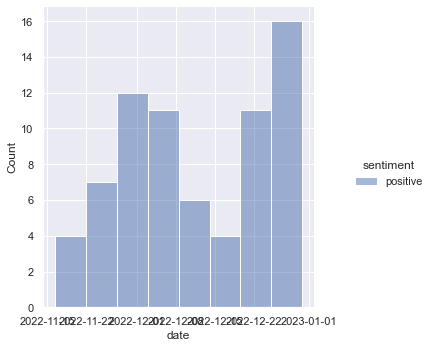

In [79]:
sns.displot(apple_df.query("sentiment=='positive'"), x = "date", hue="sentiment")

In [30]:
apple_df.to_pickle("data/apple_news_sentiment.pkl")

In [43]:
sent_val

['positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',


In [52]:
len(apple_news)

351

In [37]:
stock = 'AAPL'
n_news = 100
offset = 0
start_date = '2016-12-30'
end_date = '2021-12-30'

In [38]:
url = f'https://eodhistoricaldata.com/api/news?api_token={api_key}&s={stock}&limit={n_news}&offset={offset}&from={start_date}&to={end_date}'
news_json = requests.get(url).json()

news = []

for i in range(len(news_json)):
    title = news_json[-i]['title']
    news.append(title)

In [39]:
news_json

[{'date': '2021-12-30T23:00:00+00:00',
  'title': "The Unsung Winners and Biggest Losers of China's Rocky Markets in 2021",
  'content': '(Bloomberg) -- In a year that’s seen China’s “common prosperity” agenda roil global equity markets, the nation’s policies also created a greater divide between stock winners and losers at home.\n\nMost Read from Bloomberg\n\nGhislaine Maxwell Found Guilty in Win for Epstein Victims Mercedes Swept Up in China Internet Furor Over Models’ Eyes CDC Tells Even Vaccinated to Avoid Cruises; Shares Tumble T Cells Come to the Rescue as Studies Show They Buck Omicron Apple Aims to Prevent Defections to Meta With Rare $180,000 Bonuses for Top Talent\n\nPolicy direction looks set to drive market sentiment in 2022 as well, with a twice-a-decade party congress that could extend President Xi Jinping’s term. Jolted by Beijing’s regulatory onslaught, education names such as Gaotu Techedu Inc. and property developers like China Evergrande Group are at the bottom of th

In [40]:
news

["The Unsung Winners and Biggest Losers of China's Rocky Markets in 2021",
 'Huawei, Honor and Motorola Push New Foldable Phones in China',
 'Meta Gains as KeyBanc Sees Holidays Boosting Oculus Headset Sales',
 'Apple Stock Tests $3 Trillion Mark; New York Stores Closed Amid Covid Surge',
 'Santa Baby, Volatility, CDC Shift, Apple $3T, CES, Trading Energy Stock APA',
 'GuidePath Tactical Allocation Fund Buys Laboratory Corp of America Holdings, Alphabet Inc, The ...',
 'Apple Stock Shrugs off Store Closures in Bid for $3 Trillion Tag',
 'Pre-Market Movers: Tesla Pops, Lucid Group Dips, Nvidia and AMD Rise',
 'Stock Futures Push Higher After S&amp;P 500 Sets Another Record',
 'The 1 FAANG Stock to Buy Hand Over Fist for the Second Half of 2021 (and Beyond)',
 'A Top Growth Stock to Buy for 2022',
 'If I Could Invest in Only 1 Metaverse Stock, This Would Be It',
 "Apple's stock set to open in record territory, as it looks to extend win streak",
 'Apple Stock Just Got Safer, and With a Be

In [41]:
len(news)

100

In [22]:
tsla_news = get_customized_news('TSLA', '2011-11-09', '2021-11-11', 20, api_key, 0)

In [23]:
tsla_news

['Apple’s App Store Could Get Ad Revenue Boost From Privacy Push',
 'Making Sense of the Evolving Earnings Picture',
 'Epic Games chief to speak in S.Korea as Google, Apple face app store challenge',
 'Dow Jones Futures: Market Rally Skids Despite Solid Rivian Debut, Tesla Bounce; Affirm Spikes Late, Disney Falls',
 'Influencers with Andy Serwer: Alex Rodriguez',
 'The Sentiment Around Roku Stock Has Turned Sour',
 'Why Is Everyone Talking About The Trade Desk Stock?',
 'Dow Jones Futures Point To Market Rally; Musk Sells $5 Billion In Tesla Stock, Rivian Rises Again, Affirm Spikes',
 'Is It Too Late to Buy The Trade Desk Stock?',
 '2 Top Tech Stocks to Buy on the Dip for Long-Term Growth',
 'Applied Intuition Raises\xa0$175 Million for Automotive Software Tools',
 'Luminar Tech, Tutor Perini, Lenovo, HP and Apple highlighted as Zacks Bull and Bear of the Day',
 'Amazon (AMZN) Expands Latin America Presence Via New Launch',
 "Apple CEO Tim Cook Is a Crypto Investor but the Company Won'